<table class="table table-bordered">
    <tr>
        <th style="text-align:center; width:25%"><img src='https://www.np.edu.sg/PublishingImages/Pages/default/odp/ICT.jpg' style="width: 250px; height: 125px; "></th>
        <th style="text-align:center;"><h1>Deep Learning</h1><h2>Assignment 1 - Food Classification Model (Individual)</h2><h3>AY2020/21 Semester</h3></th>
    </tr>
</table>

In [1]:
# Import the Required Packages
from tensorflow import keras
print('keras: ', keras.__version__)

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

import matplotlib.pyplot as plt
%matplotlib inline

keras:  2.3.0-tf


## Step 1: Data Loading

In [2]:
base_dir = 'C:/Users/Keck Boy/OneDrive - Ngee Ann Polytechnic/Studies/Y2/S1/DL/Assignment 1'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

#Set image size to 150*150 
img_size = 150


## Step 2:  Develop the Image Classification Models

### Model #1

In [3]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax')) #softmax

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [5]:
from tensorflow.keras import optimizers
model.compile(loss='categorical_crossentropy', #categorical_crossentropy
              optimizer=optimizers.RMSprop(lr=1e-3), 
              metrics=['acc'])

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

batchsize = 32

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_size, img_size),
        batch_size=batchsize,
        class_mode='categorical') #categorical

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=batchsize,
        class_mode='categorical') #categorical
# Train the Model
stepsperepoch = 7500//batchsize
validationsteps = 2000//batchsize

history = model.fit_generator(
      train_generator,
      steps_per_epoch=stepsperepoch, 
      epochs=20,
      validation_data=validation_generator,
      validation_steps=validationsteps,)

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Epoch 1/20
234/234 [==============================] - 23s 100ms/step - loss: 1.7858 - acc: 0.3898 - val_loss: 1.7181 - val_acc: 0.4168
Epoch 2/20
234/234 [==============================] - 23s 100ms/step - loss: 1.4945 - acc: 0.4889 - val_loss: 1.3998 - val_acc: 0.5333
Epoch 3/20
234/234 [==============================] - 23s 98ms/step - loss: 1.2833 - acc: 0.5600 - val_loss: 1.5486 - val_acc: 0.4839
Epoch 4/20
234/234 [==============================] - 23s 98ms/step - loss: 1.0593 - acc: 0.6438 - val_loss: 1.3923 - val_acc: 0.5464
Epoch 5/20
234/234 [==============================] - 23s 98ms/step - loss: 0.8274 - acc: 0.7180 - val_loss: 1.4596 - val_acc: 0.5701
Epoch 6/20
234/234 [==============================] - 23s 97ms/step - loss: 0.5842 - acc: 0.8005 - val_loss: 1.7019 - val_acc: 0.5398
Epoch 7/20
234/234 [==============================] - 23s 100ms/step - loss: 0.3811 - acc: 0.8743 - val_loss

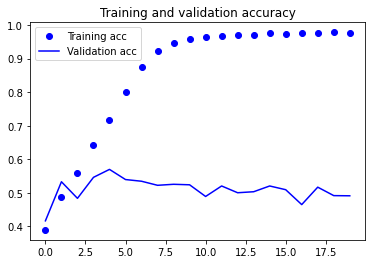

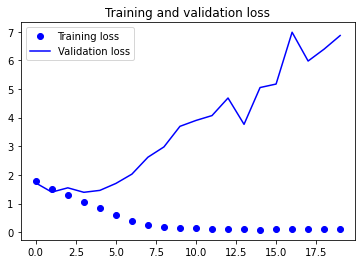

In [6]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [3]:
from tensorflow.keras import regularizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
#model.add(layers.Dropout(0.5)) 
model.add(layers.Dense(512, activation='relu',kernel_regularizer=regularizers.l1_l2(l1=1e-5,l2=1e-5)))
#model.add(layers.Dropout(0.5)) 
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [8]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-3),
              metrics=['acc'])

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=[0.2,1.0],
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

batchsize = 20
batch_size = 32

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_size, img_size),
        batch_size=batchsize,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=batchsize,
        class_mode='categorical')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=7500//batch_size, 
      epochs=50,
      validation_data=validation_generator,
      validation_steps=2000//batch_size,)

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Epoch 1/50
234/234 [==============================] - 40s 171ms/step - loss: 2.4081 - acc: 0.1628 - val_loss: 2.1748 - val_acc: 0.2774
Epoch 2/50
234/234 [==============================] - 40s 170ms/step - loss: 2.0971 - acc: 0.2759 - val_loss: 1.8812 - val_acc: 0.3685
Epoch 3/50
234/234 [==============================] - 47s 202ms/step - loss: 1.9593 - acc: 0.3376 - val_loss: 1.8395 - val_acc: 0.4056
Epoch 4/50
234/234 [==============================] - 41s 177ms/step - loss: 1.8955 - acc: 0.3731 - val_loss: 2.0104 - val_acc: 0.3726
Epoch 5/50
234/234 [==============================] - 40s 172ms/step - loss: 1.8405 - acc: 0.3904 - val_loss: 2.1182 - val_acc: 0.4185
Epoch 6/50
234/234 [==============================] - 39s 169ms/step - loss: 1.7710 - acc: 0.4314 - val_loss: 1.8367 - val_acc: 0.4097
Epoch 7/50
234/234 [==============================] - 39s 169ms/step - loss: 1.7274 - acc: 0.4423 - val_

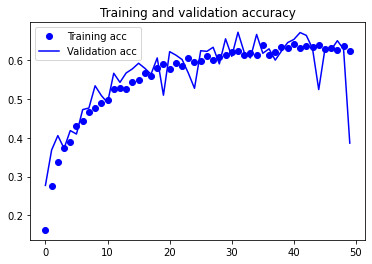

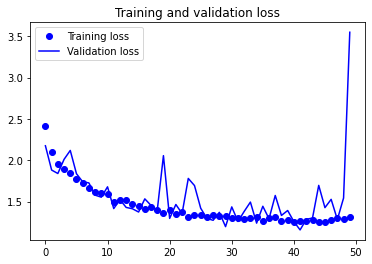

In [9]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

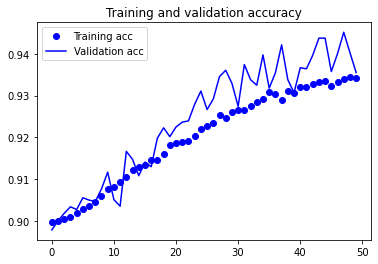

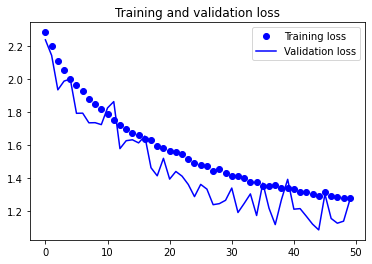

In [60]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [10]:
# Save the Model
#model.save('food_model_1.h5')

### Model #2

In [5]:
#Build the model - Pretrained model NasNetLarge
#from tensorflow.keras.applications import NASNetLarge
from tensorflow.keras.applications import Xception

#conv_base = NASNetLarge(input_shape=None,include_top=True,weights="imagenet")
conv_base = Xception(input_shape=(img_size,img_size,3),include_top=False,weights="imagenet")

conv_base.summary()

Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 74, 74, 32)   128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 74, 74, 32)   0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

In [7]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(128,activation='relu', ))
model.add(layers.Dense(10,activation='softmax'))
conv_base.trainable=False
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Model)             (None, 5, 5, 2048)        20861480  
_________________________________________________________________
flatten_1 (Flatten)          (None, 51200)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               6553728   
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 27,416,498
Trainable params: 6,555,018
Non-trainable params: 20,861,480
_________________________________________________________________


In [5]:
train_datagen = ImageDataGenerator(rescale=1./255)
#Val Data
test_datagen = ImageDataGenerator(rescale=1./255)

#set batch_size
batch_size =32

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='categorical')

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-3),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=7500//batch_size,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=2000//batch_size,
        )

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
234/234 [==============================] - 77s 327ms/step - loss: 4.9172 - acc: 0.6290 - val_loss: 1.2226 - val_acc: 0.6794
Epoch 2/30
234/234 [==============================] - 28s 118ms/step - loss: 0.9792 - acc: 0.7405 - val_loss: 1.1204 - val_acc: 0.7268
Epoch 3/30
234/234 [==============================] - 27s 115ms/step - loss: 0.7081 - acc: 0.8025 - val_loss: 1.1291 - val_acc: 0.7172
Epoch 4/30
234/234 [==============================] - 28s 119ms/step - loss: 0.5500 - acc: 0.8483 - val_loss: 1.3182 - val_acc: 0.7278
Epoch 5/30
234/234 [==============================] - 27s 115ms/step - loss: 0.4443 - acc: 0.8729 - val_loss: 1.6658 - val_acc: 0.7293
Epoch 6/30
234/234 [==============================] - 27s 117ms/step - loss: 0.3522 - acc: 0.9033 - val_loss: 1.3625 - val_acc: 0.7606
Epoch 7/30
234/234 [========

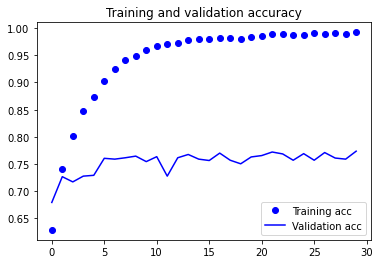

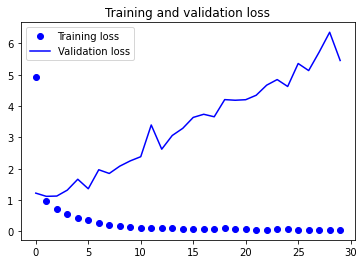

In [6]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [23]:
from tensorflow.keras import regularizers
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
#model.add(layers.Dropout(0.5))
model.add(layers.Dense(128,activation='relu',kernel_regularizer=regularizers.l1_l2(l1=1e-4, l2=1e-4)))
model.add(layers.Dense(10,activation='softmax'))
conv_base.trainable=False
model.summary()

train_datagen = ImageDataGenerator(
      rescale=1./255,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      brightness_range=[0.3,1.0],
      horizontal_flip=True,
      fill_mode='nearest',
       )
#Val Data
test_datagen = ImageDataGenerator(rescale=1./255)

#set batch_size
batch_size =32

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_size, img_size),
        batch_size=20,#batch_size,
        class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=10,#batch_size,
        class_mode='categorical')

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=7500//batch_size,
      epochs=40,
      validation_data=validation_generator,
      validation_steps=2000//batch_size,
        )

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Model)             (None, 5, 5, 2048)        20861480  
_________________________________________________________________
flatten_7 (Flatten)          (None, 51200)             0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)               6553728   
_________________________________________________________________
dense_15 (Dense)             (None, 10)                1290      
Total params: 27,416,498
Trainable params: 6,555,018
Non-trainable params: 20,861,480
_________________________________________________________________
Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Epoch 1/40
234/234 [==============================] - 37s 158ms/step - loss: 3.7171 - acc: 0.6122 - val_loss: 2.7741 - val_acc: 0.6726
Epoch 2/40


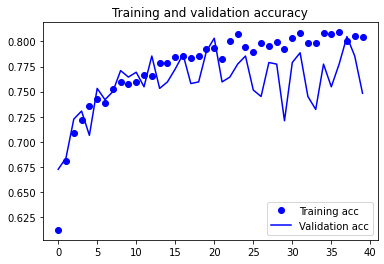

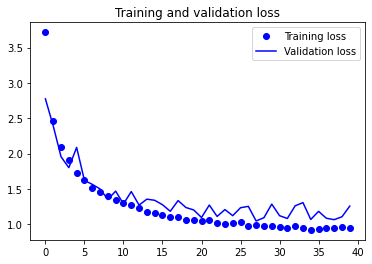

In [24]:
''''history = model.fit_generator( train_generator,steps_per_epoch=7500//batch_size,epochs=15,validation_data=validation_generator,validation_steps=2000//batch_size, )'''
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [25]:
# Save the Model
#model.save('food_model_2.h5')

## Step 3 – Evaluate the Developed Models using Testing Images

In [5]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(img_size, img_size), batch_size=20, class_mode='categorical')

Found 500 images belonging to 10 classes.


In [6]:
# Model #1
model.load_weights('food_model_1.h5')
#model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])
history = model.fit(test_generator, epochs=20)


Epoch 1/20
25/25 [==============================] - 1s 45ms/step - loss: 1.7065 - acc: 0.5300
Epoch 2/20
25/25 [==============================] - 1s 46ms/step - loss: 1.2033 - acc: 0.6520
Epoch 3/20
25/25 [==============================] - 1s 45ms/step - loss: 1.0473 - acc: 0.7040
Epoch 4/20
25/25 [==============================] - 1s 45ms/step - loss: 0.9533 - acc: 0.7140
Epoch 5/20
25/25 [==============================] - 1s 45ms/step - loss: 0.8843 - acc: 0.7380
Epoch 6/20
25/25 [==============================] - 1s 46ms/step - loss: 0.8084 - acc: 0.7500
Epoch 7/20
25/25 [==============================] - 1s 48ms/step - loss: 0.7522 - acc: 0.7800
Epoch 8/20
25/25 [==============================] - 1s 46ms/step - loss: 0.6979 - acc: 0.8020
Epoch 9/20
25/25 [==============================] - 1s 45ms/step - loss: 0.6465 - acc: 0.8120
Epoch 10/20
25/25 [==============================] - 1s 52ms/step - loss: 0.6037 - acc: 0.8300
Epoch 11/20
25/25 [==============================] - 1s 50m

In [7]:
# Model #2
model.load_weights('food_model_2.h5')
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])
history = model.fit(test_generator, epochs=20)


Epoch 1/20
25/25 [==============================] - 3s 134ms/step - loss: 1.6220 - acc: 0.7120
Epoch 2/20
25/25 [==============================] - 1s 52ms/step - loss: 0.8138 - acc: 0.8780
Epoch 3/20
25/25 [==============================] - 1s 53ms/step - loss: 0.6007 - acc: 0.9440
Epoch 4/20
25/25 [==============================] - 1s 53ms/step - loss: 0.6101 - acc: 0.9520
Epoch 5/20
25/25 [==============================] - 1s 53ms/step - loss: 0.5108 - acc: 0.9740
Epoch 6/20
25/25 [==============================] - 1s 53ms/step - loss: 0.5115 - acc: 0.9700
Epoch 7/20
25/25 [==============================] - 1s 52ms/step - loss: 0.4573 - acc: 0.9800
Epoch 8/20
25/25 [==============================] - 1s 53ms/step - loss: 0.4538 - acc: 0.9860
Epoch 9/20
25/25 [==============================] - 1s 54ms/step - loss: 0.5315 - acc: 0.9620
Epoch 10/20
25/25 [==============================] - 1s 51ms/step - loss: 0.4165 - acc: 0.9880
Epoch 11/20
25/25 [==============================] - 1s 51

In [8]:
# Save the best model
model.load_weights('food_model_2.h5')

model.save('food_model_best.h5')

## Step 4  – Use the best model to make prediction

In [7]:
# Load the model
model.load_weights('food_model_best.h5')

In [8]:
# Load the food list (in alphabetical order)
#7.txt will increase shape of food_list, due to spaces between each food item, spaces have been deleted
with open('C:/Users/Keck Boy/OneDrive - Ngee Ann Polytechnic/Studies/Y2/S1/DL/Assignment 1/7.txt', 'r') as f: # the .txt file which contains a list of food assigned to you
    x = f.readlines()
food_list =[]
for item in x:
    food_list.append(item.strip('\n'))
food_list = sorted(food_list) # food_list needs to be sorted alphabetically before feed into prediction() function
print(food_list)

['beet_salad', 'bibimbap', 'caprese_salad', 'crab_cakes', 'creme_brulee', 'fish_and_chips', 'fried_rice', 'ice_cream', 'macarons', 'red_velvet_cake']


In [9]:
# Define some related functions for image process and model prediction
from tensorflow.keras.preprocessing.image import load_img, img_to_array
def image_process(img):
    image = load_img(img, target_size =(img_size, img_size))
    image_array = img_to_array(image)/255
    return image_array

import pandas as pd
def prediction(model, img_array, items_l):
    prob = model.predict(img_array.reshape(1,img_size,img_size,3))
    pro_df = pd.DataFrame(prob, columns = items_l)
    result = items_l[np.argmax(prob)]
    return pro_df, result

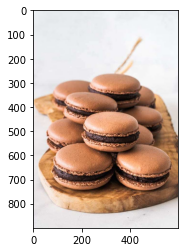

The prediction is:  macarons 

      beet_salad  bibimbap  caprese_salad  crab_cakes  creme_brulee  \
0  2.495876e-07  0.000002       0.001107    0.001431      0.004769   

   fish_and_chips  fried_rice  ice_cream  macarons  red_velvet_cake  
0        0.000352    0.000004   0.000006  0.991754         0.000575  


In [24]:
# Make prediction for the image you downloaded from internet
import matplotlib.pyplot as plt
img = 'C:/Users/Keck Boy/OneDrive - Ngee Ann Polytechnic/Studies/Y2/S1/DL/Assignment 1/chocolate-macaron-10.jpg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)

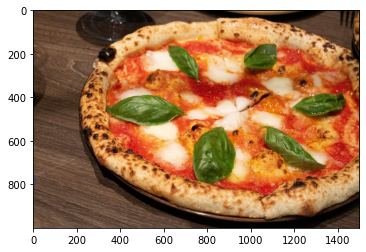

The prediction is:  caprese_salad 

    beet_salad  bibimbap  caprese_salad  crab_cakes  creme_brulee  \
0    0.004185  0.001028       0.859231    0.016459      0.117223   

   fish_and_chips  fried_rice  ice_cream  macarons  red_velvet_cake  
0        0.000259    0.000824   0.000252  0.000002         0.000537  


In [25]:
# Make prediction for the image you downloaded from internet
import matplotlib.pyplot as plt
img = 'C:/Users/Keck Boy/OneDrive - Ngee Ann Polytechnic/Studies/Y2/S1/DL/Assignment 1/Margherita+DOP+Pizza.jpg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)

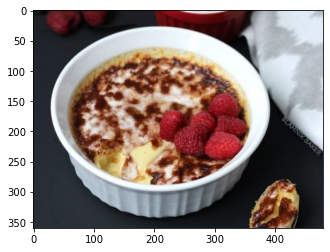

The prediction is:  creme_brulee 

    beet_salad  bibimbap  caprese_salad  crab_cakes  creme_brulee  \
0    0.000051  0.003017       0.000015    0.009844       0.98308   

   fish_and_chips  fried_rice  ice_cream      macarons  red_velvet_cake  
0        0.000255    0.003669   0.000066  2.037562e-08         0.000003  


In [26]:
# Make prediction for the image you downloaded from internet
import matplotlib.pyplot as plt
img = 'C:/Users/Keck Boy/OneDrive - Ngee Ann Polytechnic/Studies/Y2/S1/DL/Assignment 1/Vanilla-bean-creme-brulee_3-480x360.jpg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)

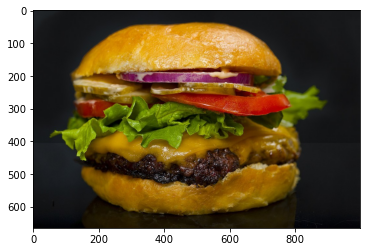

The prediction is:  fish_and_chips 

    beet_salad  bibimbap  caprese_salad  crab_cakes  creme_brulee  \
0    0.000101   0.00279       0.001177    0.071907      0.015993   

   fish_and_chips  fried_rice  ice_cream  macarons  red_velvet_cake  
0         0.89573     0.00073   0.000129  0.002499         0.008944  


In [11]:
# Make prediction for the image you downloaded from internet
import matplotlib.pyplot as plt
img = 'C:/Users/Keck Boy/OneDrive - Ngee Ann Polytechnic/Studies/Y2/S1/DL/Assignment 1/burger.jpg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)